In [6]:
import sqlite3

# SQLiteデータベースに接続
conn = sqlite3.connect('sleep_data.db')
cursor = conn.cursor()

# duration列からデータを取り出す
cursor.execute('SELECT duration FROM sleep_data')

# 結果を取得
sleep_data = cursor.fetchall()

# データベース接続を閉じる
conn.close()

sleep_data = [float(entry[0]) for entry in sleep_data]

print(data)

[3.5, 4.0, 4.0, 4.0, 2.2, 4.0, 4.0, 2.7, 4.0, 3.2, 4.0, 0.3, 3.7, 4.0, 2.4, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 2.2, 4.0, 4.0, 1.5, 4.0, 2.8, 3.7, 2.7, 1.7, 4.0]


In [9]:
# SQLiteデータベースに接続
conn = sqlite3.connect('weather_data.db')
cursor = conn.cursor()

# duration列からデータを取り出す
cursor.execute('SELECT temperature FROM average_temperatures')

# 結果を取得
temperatures_data = cursor.fetchall()

# データベース接続を閉じる
conn.close()

temperatures_data = [float(entry[0]) for entry in temperatures_data]

print(temperatures_data)

[6.4, 6.0, 6.8, 8.3, 6.7, 11.1, 10.9, 11.2, 10.2, 11.1, 11.5, 13.2, 11.0, 8.4, 9.4, 13.6, 9.5, 5.1, 4.6, 6.9, 5.4, 3.8, 4.1, 3.0, 3.7, 6.1, 7.8, 4.4, 7.1, 7.6, 9.3]


In [19]:
import pandas as pd

df1 = pd.DataFrame({'sleep_time': sleep_data})

df2 = pd.DataFrame({'temperature_average': temperatures_data})

# 2つのデータを行方向に結合
combined_df = pd.concat([df1, df2], axis=1)

# 行の番号を1から始める
combined_df.index += 1

print(combined_df)

    sleep_time  temperature_average
1          3.5                  6.4
2          4.0                  6.0
3          4.0                  6.8
4          4.0                  8.3
5          2.2                  6.7
6          4.0                 11.1
7          4.0                 10.9
8          2.7                 11.2
9          4.0                 10.2
10         3.2                 11.1
11         4.0                 11.5
12         0.3                 13.2
13         3.7                 11.0
14         4.0                  8.4
15         2.4                  9.4
16         4.0                 13.6
17         4.0                  9.5
18         4.0                  5.1
19         4.0                  4.6
20         4.0                  6.9
21         0.0                  5.4
22         2.2                  3.8
23         4.0                  4.1
24         4.0                  3.0
25         1.5                  3.7
26         4.0                  6.1
27         2.8              

In [23]:
df = pd.DataFrame(combined_df)

# 基本統計量を表示
print(combined_df.describe())

       sleep_time  temperature_average
count   31.000000            31.000000
mean     3.245161             7.877419
std      1.132796             2.941622
min      0.000000             3.000000
25%      2.700000             5.700000
50%      4.000000             7.600000
75%      4.000000            10.550000
max      4.000000            13.600000


In [24]:
# 相関係数を計算
correlation = combined_df['sleep_time'].corr(combined_df['temperature_average'])
print(f"相関係数: {correlation}")

相関係数: 0.033727026222533825


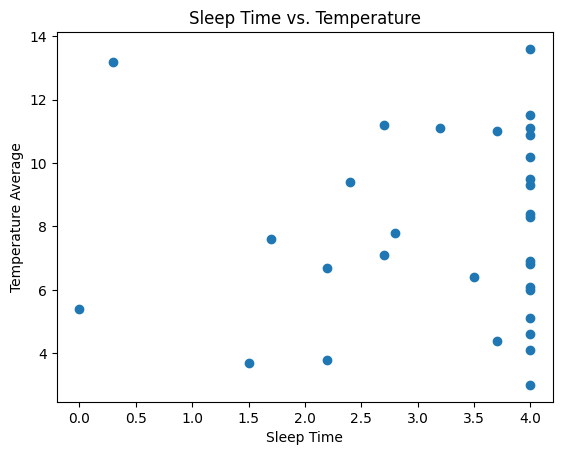

In [27]:
import matplotlib.pyplot as plt

# 散布図を描画
plt.scatter(combined_df['sleep_time'], combined_df['temperature_average'])
plt.title('Sleep Time vs. Temperature')
plt.xlabel('Sleep Time')
plt.ylabel('Temperature Average')
plt.show()

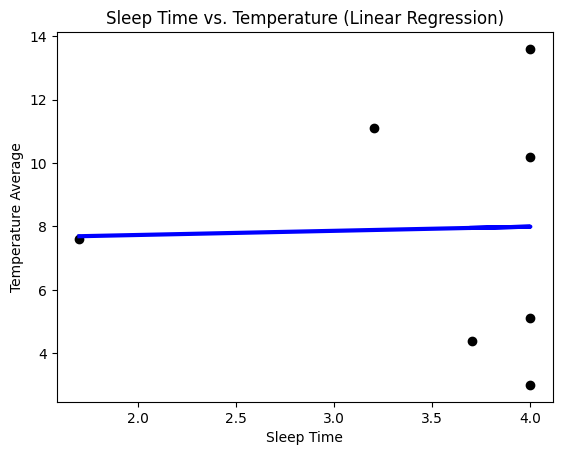

Mean Squared Error: 13.223044834011999


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.DataFrame(combined_df)

# 睡眠時間を説明変数、気温を目的変数として設定
X = df[['sleep_time']]
y = df['temperature_average']

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの作成と学習
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータを使って予測
y_pred = model.predict(X_test)

# 予測結果を可視化
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Sleep Time vs. Temperature (Linear Regression)')
plt.xlabel('Sleep Time')
plt.ylabel('Temperature Average')
plt.show()

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')